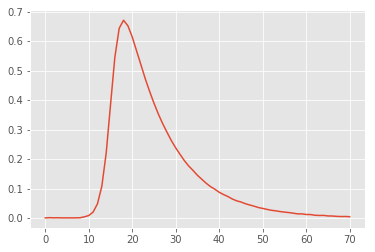

In [73]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from scipy.stats import truncnorm
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

def generate_data(x,beta,gamma):

    TS=1.0
    ND=70
    S0=1-1e-6
    I0=1e-6
    INPUT = (S0, I0, 0.0)


    def diff_eqs(INP,t):  
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP    
        Y[0] = - beta * V[0] * V[1]
        Y[1] = beta * V[0] * V[1] - gamma * V[1]
        Y[2] = gamma * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = spi.odeint(diff_eqs,INPUT,t_range)
    return RES[:,1] +  truncnorm.rvs(0, 100000, scale=.001, size=71)
#print (data)
#print (t_range)
generated_data = generate_data([],1,.1)
plt.plot(generated_data)
plt.show()

/Users/gcgibson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/Users/gcgibson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/gcgibson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/Users/gcgibson/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


[0.99986614 0.09961688]
[[1.62564361e-08 1.66918521e-10]
 [1.66918521e-10 2.14878744e-09]]


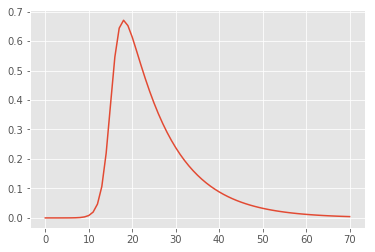

In [74]:
from scipy.optimize import curve_fit

def simple_sir(x,beta,gamma):
    #beta=1.4247
    #gamma=0.14286
    TS=1.0
    ND=70
    S0=1-1e-6
    I0=1e-6
    INPUT = (S0, I0, 0.0)


    def diff_eqs(INP,t):  
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP    
        Y[0] = - beta * V[0] * V[1]
        Y[1] = beta * V[0] * V[1] - gamma * V[1]
        Y[2] = gamma * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = spi.odeint(diff_eqs,INPUT,t_range)
    return RES[:,1]


popt, pcov = curve_fit(simple_sir, range(len(generated_data)), generated_data)
print (popt)
print (pcov)

#popt = [2,1]
local_sampled_trajectories = simple_sir([],popt[0],popt[1])
plt.plot(local_sampled_trajectories)
plt.show()

In [75]:

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from keras.layers.core import Lambda
from keras import backend as K

from sklearn.metrics import mean_squared_error
batch_size =1

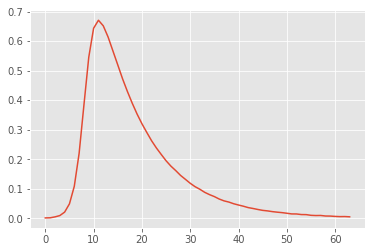

In [89]:
def create_lag_training_set(data,num_lag=6,step_ahead=1):
    X = []
    y = []
    
    for i in range(num_lag,len(data)-step_ahead):
        X.append(data[i-num_lag:i])
        y.append(data[i+step_ahead])
        
    return np.array(X),np.array(y)

X,y = create_lag_training_set(generated_data)
plt.plot(y)
plt.show()

In [90]:
def nn_no_sir(x_train,x_test,y_train,y_test):
    model = Sequential()
    model.add(Dense(4, activation='tanh', input_shape=(6,)))
    #model.add(Lambda(lambda x: K.dropout(x, level=0.001)))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1, activation='linear'))


    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop())

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=100,
                        verbose=0)

    nn_pred = []
    num_mcmc_samples = 1000
    for s in range(num_mcmc_samples):
        nn_pred.append(model.predict(x_test))
    nn_pred_mean = np.mean(nn_pred,axis=0)
    return nn_pred_mean

In [91]:
def nn_w_sir(x_train,x_test,y_train,y_test,data):
    #ll_sampled_trajectories= get_sir_trajectories(data)
 
    X,y = create_lag_training_set(local_sampled_trajectories)
    x_train = X[:len(X)-30]
    x_test= X[len(X)-30:]
    y_train= y[:len(X)-30]
    y_test = y[len(X)-30:]
    
    model = Sequential()
    model.add(Dense(4, activation='tanh', input_shape=(6,)))
    #model.add(Lambda(lambda x: K.dropout(x, level=0.001)))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1, activation='linear'))


    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop())

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=100,
                        verbose=0)
   

    X,y = create_lag_training_set(data)
    x_train = X[:len(X)-30]
    x_test= X[len(X)-30:]
    y_train= y[:len(X)-30]
    y_test = y[len(X)-30:]
    
    model.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=0,
                         verbose=0)
    nn_pred = []
    num_mcmc_samples = 1000
    for s in range(num_mcmc_samples):
        nn_pred.append(model.predict(x_test))
    nn_pred_mean_sir = np.mean(nn_pred,axis=0)
    return nn_pred_mean_sir

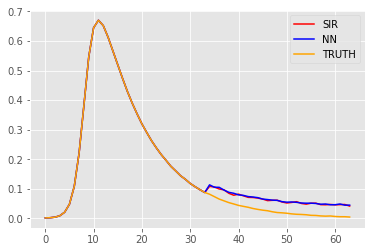

(0.0014752388876561546, 0.0013789377819397987)


KeyboardInterrupt: 

In [92]:
plt.style.use('ggplot')


def run_experiment(data,sim):
    

  
    X,y = create_lag_training_set(data)
    x_train = X[:len(X)-30]
    x_test= X[len(X)-30:]
    y_train= y[:len(X)-30]
    y_test = y[len(X)-30:]
   
    nn_no_sir_pred = nn_no_sir(x_train,x_test,y_train,y_test)
    nn_w_sir_pred = nn_w_sir(x_train,x_test,y_train,y_test,data)
    if sim <= 10:
        plt.plot(np.append(y_train, nn_w_sir_pred), color='red')
        plt.plot(np.append(y_train,nn_no_sir_pred),color='blue')
        plt.plot(np.append(y_train,y_test),color='orange')
        plt.legend(("SIR","NN","TRUTH"))
        plt.show()
    return mean_squared_error(nn_w_sir_pred,y_test),mean_squared_error(nn_no_sir_pred,y_test)

total_nn = 0
total_sir_nn = 0 
num_sims = 100
for sim in range(num_sims):
    tmp_dat = generate_data([],1,.1)
    if tmp_dat.all() >= 0:
        sir_nn,nn = run_experiment(tmp_dat, sim)
        print (nn,sir_nn)
    total_nn +=nn
    total_sir_nn += sir_nn
    
print (total_nn,total_sir_nn)